# Example 2 &ndash; An excitator&ndash;excitator pair

In this example, we reproduce figures 7 to 11 of the paper [*Beyond Wilson-Cowan dynamics: oscillations and chaos without inhibition*](https://doi.org/10.1007/s00422-022-00941-w). We also compute the Lyapunov exponents given in Table 1. For details on PopNet's functions, see the [documentation](https://vincentpainchaud.github.io/PopNet/) of the package.

In [1]:
import popnet as pn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.ioff()

We start by defining the configuration with all parameters used in this example.

In [2]:
config = pn.default_config('2B', scale='micro')
config.resize_network([1000, 1000])

pop1, pop2 = config.network.populations

pop1.set_means(alpha=12.5, beta=3, gamma=1, theta=2)
pop1.set_scales(theta=.4)

pop2.set_means(alpha=3.6, beta=8, gamma=.8, theta=.84)
pop2.set_scales(theta=.2)

config.network.c = [[8, .6], [.01, 14]]
config.network.reset_parameters()

config.initial_state = .1, .02, .3, .2
config.final_time = 100
config.delta = .01

## Solutions

Here, we integrate numerically both the mean-field system and its subsystem that is equivalent to Wilson&ndash;Cowan's classical equation. First, we perform the integration with PopNet's methods.

In [3]:
solutions = []
for system_name in ['wilson-cowan', 'mean-field']:
    integrator = pn.get_integrator(config, system_name)
    integrator.run('ode')
    solutions.append(integrator.output())
    integrator.close()

Then, we define a Matplotlib figure on which we will plot the solutions.

In [4]:
mm = 1/25.4
preamble = ('\\usepackage[cal=cm]{mathalpha}'
            '\\usepackage{helvet}'
            '\\usepackage{sansmath}'
            '\\sansmath')
fig, axes = pn.figure(subplots=(211, 212), figsize=(84*mm, 70*mm), font_family='sans-serif',
                      usetex=True, preamble=preamble, tight_layout=False)
fig.subplots_adjust(left=.07, right=.96, bottom=.125, top=.83)

The following function will be used to reorder the entries of the legend.

In [5]:
def reorder_entries(L):
    return [L[0], L[3], L[1], L[4], L[2], L[5]]

We plot the solutions obtained above, and then we draw the figure.

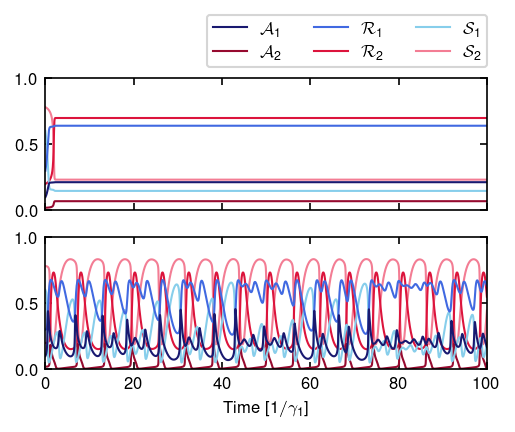

In [6]:
for j, solution in enumerate(solutions):
    solution.fig = fig
    solution.ax = axes[j]
    solution.plot_expectations(lw=1)
    for k, line in enumerate(solution.ax.get_lines()):
        line.zorder += .5 - .1 * k
    solution.setup(units='$1/\\gamma_1$', set_xlabel=j==1, fontsize=8)
    solution.ax.tick_params(labelsize=8)
    if j == 0:
        solution.ax.set_xticklabels([])
        handles, labels = solution.ax.get_legend_handles_labels()
        handles = reorder_entries(handles)
        labels = reorder_entries(labels)
        solution.ax.legend(handles, labels, ncol=3, fontsize=8, loc='lower right', bbox_to_anchor=(1.02, 1.02))
pn.draw()

## Projections of the mean-field solution on the $\mathcal{A}_1$&ndash;$\mathcal{R}_1$ subspace

Now, we draw projections of the solution to the mean-field system on the $\mathcal{A}_1$&ndash;$\mathcal{R}_1$ subspace. We want to draw these projections on increasing time intervals, so we need new configurations with modified time intervals. We start by defining them.

In [7]:
long_config = config.copy('2Ba')
long_config.final_time = 400
long_config.delta = .01

longer_config = config.copy('2Bb')
longer_config.final_time = 1600
longer_config.delta = .01

Now, we perform the numerical integrations with PopNet's functions, as done earlier.

In [8]:
solutions = [solutions[1]]
for conf in [long_config, longer_config]:
    integrator = pn.get_integrator(conf, 'mean-field')
    integrator.run('ode')
    solutions.append(integrator.output())
    integrator.close()

We plot all three projections of solutions on the same figure.

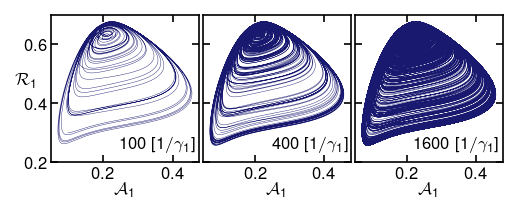

In [9]:
fig, axes = pn.figure(subplots=(131, 132, 133), figsize=(84*mm, 32*mm), font_family='sans-serif',
                      usetex=True, preamble=preamble, tight_layout=False)
fig.subplots_adjust(wspace=.03, top=.97, bottom=.19, left=.08, right=.99)

for j, (ax, sol) in enumerate(zip(axes, solutions)):
    ax.plot(sol.A[0], sol.R[0], linewidth=.2)
    time_interval = f'{round(sol.config.final_time)} $[1/\\gamma_1]$'
    ax.text(.985, .09, time_interval, fontsize=8, transform=ax.transAxes, ha='right')
    ax.set_xlabel('$\\mathcal{A}_1$', fontsize=8, labelpad=0)
    if j == 0:
        ax.set_ylabel('$\\mathcal{R}_1$', fontsize=8, labelpad=-1, rotation=0)
    else:
        ax.set_yticklabels([])
    ax.tick_params(labelsize=8, pad=2)
    ax.set_ylim([.2, .7])
pn.draw()

## Attractor

Here, we draw a projection of the solution on the $\mathcal{A}_1$&ndash;$\mathcal{A}_2$&ndash;$\mathcal{R}_1$ subspace. This projection seems to converge to a bounded subset of this space, suggesting the presence of a strange attractor. We use the solution on 1600 time units that we obtained in the last step.

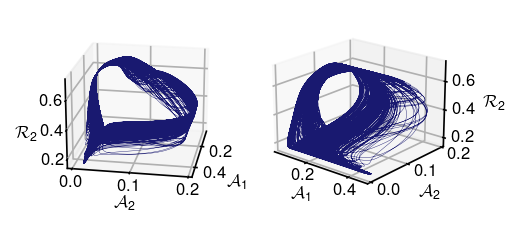

In [10]:
fig, ax = pn.figure(figsize=(84*mm, 32*mm), font_family='sans-serif', usetex=True, preamble=preamble, tight_layout=False)
fig.delaxes(ax)
fig.subplots_adjust(wspace=0, top=1.06, bottom=.06, left=.03, right=.915)

pos = {10: 121, -50: 122}
labelpads = { 10: {'x': -6,  'y': -11, 'z': -9},
             -50: {'x': -11, 'y': -10, 'z': -7}}
tickpads = { 10: {'x': -5, 'y': -6, 'z': -7},
            -50: {'x': -6, 'y': -5, 'z': -6}}
ha = { 10: {'x': 'left',   'y': 'center', 'z': 'right'},
      -50: {'x': 'center', 'y': 'left',   'z': 'left'}}
va = { 10: {'x': 'center', 'y': 'top',    'z': 'center'},
      -50: {'x': 'top',    'y': 'center', 'z': 'center'}}

start = 1000
A0 = solutions[-1].A[0][start:]
A1 = solutions[-1].A[1][start:]
R1 = solutions[-1].R[1][start:]

for angle in [10, -50]:
    ax = fig.add_subplot(pos[angle], projection='3d')
    ax.view_init(elev=20, azim=angle)
    ax.plot(A0, A1, R1, linewidth=.2)
    ax.set_xlabel('$\\mathcal{A}_1$', fontsize=8, rotation=0, labelpad=labelpads[angle]['x'])
    ax.set_ylabel('$\\mathcal{A}_2$', fontsize=8, rotation=0, labelpad=labelpads[angle]['y'])
    ax.set_zlabel('$\\mathcal{R}_2$', fontsize=8, rotation=0, labelpad=labelpads[angle]['z'])
    ax.set_xlim((.049, .478))
    ax.set_ylim((-.004, .202))
    ax.set_zlim((.15, .73))
    for coord, axis in zip(['x', 'y', 'z'], [ax.xaxis, ax.yaxis, ax.zaxis]):
        axis.set_rotate_label(False)
        ax.tick_params(labelsize=8, axis=coord, pad=tickpads[angle][coord])
        for tick in axis.get_majorticklabels():
            tick.set_horizontalalignment(ha[angle][coord])
            tick.set_verticalalignment(va[angle][coord])
pn.draw()

## Correlation dimension of the attractor

Now, we estimate the correlation dimension of the attractor displayed in the last figure. We start by defining a new configuration for this purpose, and performing the numerical integration of the mean-field system with this configuration.

In [11]:
very_long_config = config.copy('2BL+')
very_long_config.final_time = 500000
very_long_config.delta = .01

integrator = pn.get_integrator(very_long_config, 'mean-field')
integrator.run('ode')
solution = integrator.output()
integrator.close()

Using the solution integrated above, we compute correlations. More precisely, for 100 points $x$, we count the number $N_x$ of points of the solution lying in a ball in a radius $r$ around $x$, and then we average the results to get a correlation.

In [12]:
radius = np.logspace(-4.05, -1.8, 16)
states = np.concatenate((solution.A, solution.R)).T

first_time_units = 10000
states = states[first_time_units:]
skip = round(len(states) / 100)
states_for_counts = states[::skip]

counts = np.zeros((len(radius), len(states_for_counts)))
for j, r in tqdm(enumerate(radius)):
    for k, state in enumerate(states_for_counts):
        # We subtract 1 from the count to exclude the count of the state itself.
        counts[j,k] = np.sum(np.linalg.norm(state - states, axis=1) < r) - 1
correlation = np.sum(counts, axis=1) / len(states)**2

16it [1:21:27, 305.46s/it]


From these correlations, we perform a linear regression to estimate the correlation dimension.

In [13]:
x = np.log(radius)
y = np.log(correlation)
A = np.vstack([x, np.ones(len(x))]).T
(m, b), residuals, _, _ = np.linalg.lstsq(A, y, rcond=None)

print('Correlation dimension:', m)
mean_logeps = np.mean(np.log(radius))
print('Error on this value from the linear regression:',
      np.sqrt( 1/(len(radius) - 2) * residuals / np.sum((np.log(radius) - mean_logeps)**2) ))

Correlation dimension: 2.173409873980133
Error on this value from the linear regression: [0.00464682]


Finally, we draw a figure with the points and the results of the linear regression.

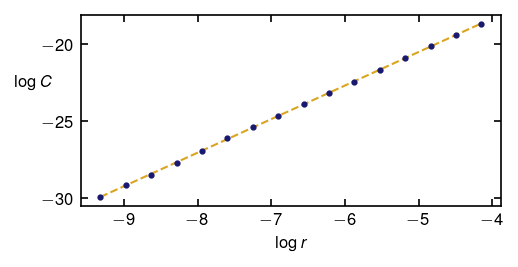

In [14]:
fig, ax = pn.figure(figsize=(84*mm, 42*mm), font_family='sans-serif', usetex=True, preamble=preamble, tight_layout=False)
fig.subplots_adjust(left=.14, bottom=.2, top=.97, right=.985)

ax.plot(np.log(radius), m*np.log(radius) + b, '--', lw=1, color='C2')
ax.plot(np.log(radius), np.log(correlation), 'o', ms=2, color='C0')
ax.set_xlabel('$\\log r$', fontsize=8)
ax.set_ylabel('$\\log C$', fontsize=8, rotation=0, y=.6)
ax.set_yticks([-30, -25, -20])
ax.tick_params(labelsize=8)
pn.draw()

## Lyapunov exponents

To confirm the chaotic behavior of the solution, we compute estimates of its Lyapunov exponents. We want to do this for different combinations of integration intervals and time steps, so we define new configurations.

In [15]:
lyapunov_config = config.copy('2BL')
lyapunov_config.final_time = 1000
lyapunov_config.delta = .01

lyapunov_long_config = config.copy('2BLL')
lyapunov_long_config.final_time = 10000
lyapunov_long_config.delta = .01

lyapunov_small_steps_config = config.copy('2BLS')
lyapunov_small_steps_config.final_time = 1000
lyapunov_small_steps_config.delta = .001

lyapunov_long_small_steps_config = config.copy('2BLLS')
lyapunov_long_small_steps_config.final_time = 10000
lyapunov_long_small_steps_config.delta = .001

configs = [lyapunov_config,
           lyapunov_long_config,
           lyapunov_small_steps_config,
           lyapunov_long_small_steps_config]

Now, we perform the numerical integrations, and we compute Lyapunov exponents using PopNet's functions.

In [16]:
all_exponents = []
for conf in configs:
    integrator = pn.get_integrator(conf, 'mean-field', lyapunov=True)
    integrator.run(verbose=True)
    _, exponents = integrator.output()
    all_exponents.append(exponents)
    integrator.close()

100%|████████████████████████████████████████████████| 10000000/10000000 [8:50:04<00:00, 314.42it/s]


We print the values of all exponents for each combination.

In [17]:
for conf, exponents in zip(configs, all_exponents):
    print('Final time:', conf.final_time, 'time step:', conf.delta)
    for exponent in exponents:
        print(f'\t{exponent}')

Final time: 1000.0 time step: 0.01
	0.1592227599683619
	0.004236149169756792
	-0.5158096744521905
	-2.4566725937210063
Final time: 10000.0 time step: 0.01
	0.15721234676232393
	0.00040622741604040514
	-0.503244722205646
	-2.459209353324833
Final time: 1000.0 time step: 0.001
	0.16908629171640427
	0.001020016493871309
	-0.5275475987264815
	-2.455256398123032
Final time: 10000.0 time step: 0.001
	0.16328496893386021
	0.0004908753286797701
	-0.5057692986178627
	-2.459157100156098


## Trajectory

We conclude with an example of the macroscopic behavior of a trajectory of the underlying Markov chain. Remark that, as the simulation is random, the trajectory is not exactly the same as that shown in the paper.

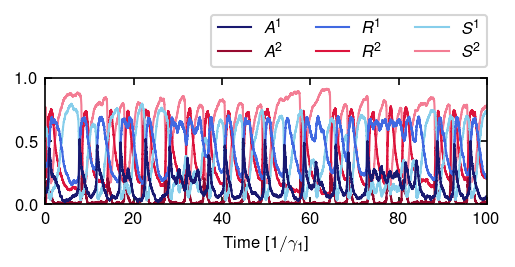

In [18]:
simulator = pn.get_simulator(config, act='sigmoid')
simulator.run()
trajectory = simulator.output()
simulator.close()

trajectory.activate(figsize=(84*mm, 42*mm), font_family='sans-serif', usetex=True, preamble=preamble, tight_layout=False)
trajectory.fig.subplots_adjust(left=.07, right=.96, bottom=.21, top=.72)

trajectory.plot_fractions(lw=1)
for k, line in enumerate(trajectory.ax.get_lines()):
    line.zorder += .5 - .1 * k
trajectory.setup(units='$1/\\gamma_1$', fontsize=8)
trajectory.ax.tick_params(labelsize=8)

handles, labels = trajectory.ax.get_legend_handles_labels()
handles = reorder_entries(handles)
labels = reorder_entries(labels)
trajectory.ax.legend(handles, labels, ncol=3, fontsize=8, loc='lower right', bbox_to_anchor=(1.02, 1.02))

pn.draw()